In [1]:
import numpy as np
import string

def _read_csv(data_dir, file_name):
    import csv
    with open(data_dir + '/' + file_name + '.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        first_row = True
        code = []
        freq = []
        for row in reader:
            if first_row:
                first_row = False
                continue
            code.append(row[0].lower())
            freq.append(int(row[1]))
    return code, np.array(freq)
    
code, freq = _read_csv('../data/part1-data', 'ngrams3')

d = dict(zip(code, freq))

for l1 in string.ascii_lowercase:
    for l2 in string.ascii_lowercase:
        for l3 in string.ascii_lowercase:
            if l1+l2+l3 not in d:
                d[l1+l2+l3] = 10000
                
print(len(d))

17576


In [2]:
p3 = np.zeros((28,28,28))

for i1, l1 in enumerate(string.ascii_lowercase):
    for i2, l2 in enumerate(string.ascii_lowercase):
        for i3, l3 in enumerate(string.ascii_lowercase):
            p3[i1, i2, i3] = d[l1+l2+l3]
            
#print(np.sum(p3))

In [3]:
#p3 = p3.astype(np.float64) / np.sum(p3)
#p3[p3 == 0] = 1
#lp3 = np.log(p3)
#np.save('../data/ngrams/lp3.npy',p3)

In [4]:
def _read_text(data_dir, file_name):
    with open(data_dir + '/' + file_name + '.txt', 'r') as textfile:
        return textfile.readlines()
    
    
def _read_csv(data_dir, file_name):
    import csv
    with open(data_dir + '/' + file_name + '.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        return list(reader)
alphabet = _read_csv('../data/part1-data', 'alphabet')[0]

def _translate(text):
    dictionary = dict(zip(alphabet, range(len(alphabet))))
    return np.array([dictionary[t] for t in text])
  
pt1 = _read_text('../data/part1-data', 'plaintext')[0]
pt2 = _read_text('../data/part2-data', 'plaintext_feynman')[0]
pt3 = _read_text('../data/part2-data', 'plaintext_paradiselost')[0]
pt4 = _read_text('../data/part2-data', 'plaintext_warandpeace')[0]
pc = _translate(pt1 + pt2 + pt3 + pt4)


emp3 = np.zeros((28,28,28))

np.add.at(emp3, (pc[:-2], pc[1:-1], pc[2:]), 1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(p3[0,])
plt.show()
sns.heatmap(emp3[0,])
plt.show()

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

60490.0 2098210386991.0


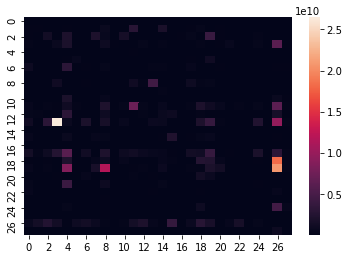

In [5]:
print(np.sum(emp3[:26,:26,:26]), np.sum(p3))
emp3 = emp3 / np.sum(emp3[:26,:26,:26]) * np.sum(p3)
emp3[:26,:26,:26] = p3[:26,:26,:26]
emp3[emp3==0] = 10000
sns.heatmap(emp3[0,])
plt.show()

In [8]:
print(np.sum(emp3==0))
emp3 = emp3 / np.sum(emp3)
lp3 = np.log(emp3)
np.save('../data/ngrams/lp3-r.npy', lp3)

0
